In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Reshape the data to fit the model input
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

C:\Users\OJAS VIJAY AMBEKAR\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=200, validation_split=0.2)

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.7339 - loss: 0.8392 - val_accuracy: 0.9747 - val_loss: 0.0838
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9628 - loss: 0.1308 - val_accuracy: 0.9826 - val_loss: 0.0587
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9732 - loss: 0.0915 - val_accuracy: 0.9863 - val_loss: 0.0475
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.9809 - loss: 0.0670 - val_accuracy: 0.9872 - val_loss: 0.0436
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.9809 - loss: 0.0609 - val_accuracy: 0.9882 - val_loss: 0.0401
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.9854 - loss: 0.0488 - val_accuracy: 0.9888 - val_loss: 0.0389
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9859 - loss: 0.0460 - val_accuracy: 0.9903 - val_loss: 0.0359
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9879 - loss: 0.0406 - 

In [6]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


Test loss: 0.02995104156434536
Test accuracy: 0.9908000230789185
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


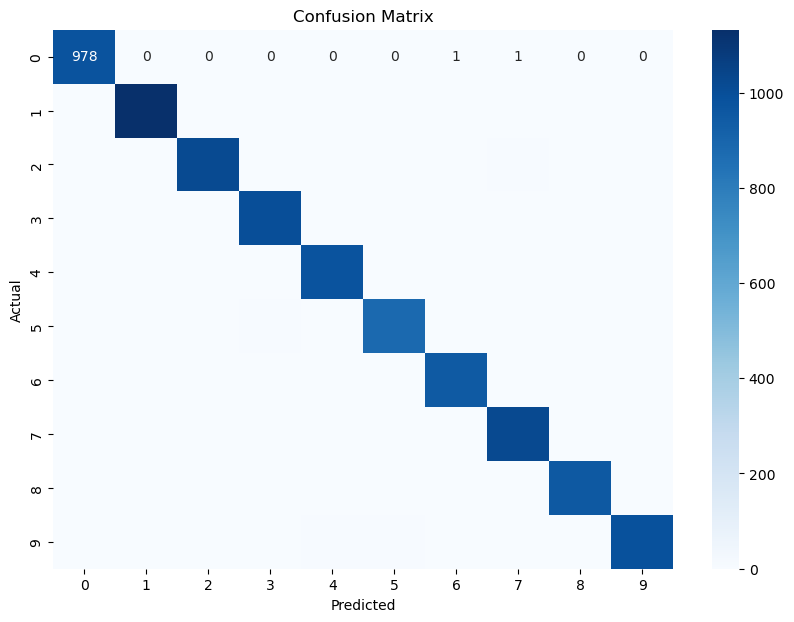

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [7]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes))